<a href="https://colab.research.google.com/github/WenxuanDU/Machine-Learning/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import and Clean data

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/econ441b/Country-data.csv", sep = ",")

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)

In [ ]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [ ]:
kmeans = KMeans(n_clusters= 3
                ,random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.fit(X_scaled)

KMeans(n_clusters=5, n_init=30)

# 2.) Pick two features to visualize across

In [ ]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

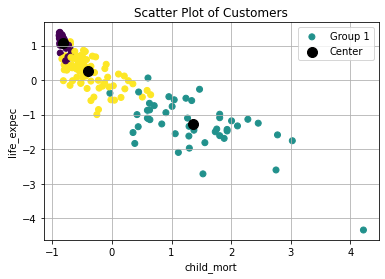

In [ ]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 6



plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means


In [ ]:
WCSSs = []
Ks = range(1,31)
for k in Ks:
  kmeans = KMeans(n_clusters = k, n_init=30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

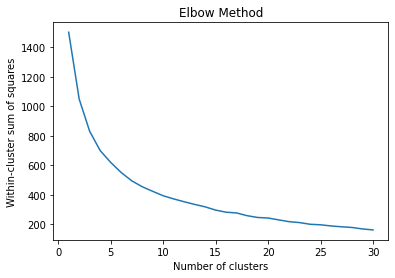

In [ ]:
plt.plot(range(1, 31), WCSSs)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow Method')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

the resulting plot shows an elbow point around k=5, where the WSS starts to level off. This suggests that there may be four distinct groups or clusters within the data.

In [ ]:
## model fitting

kmeans = KMeans(n_clusters=5, n_init=30)
kmeans.fit(X_scaled)


labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [ ]:
labels = kmeans.predict(X_scaled)

clusters = {str(i): [] for i in range(kmeans.n_clusters)}
for i, label in enumerate(labels):
    country = df.iloc[i]['country']
    clusters[str(label)].append(country)

# Print the countries in each cluster
for i in range(kmeans.n_clusters):
    print('Cluster', i, ':', clusters[str(i)])

Cluster 0 : ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
Cluster 1 : ['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Fiji', 'Georgia', 'Grenada', 'Guatemala

Countries in Cluster 0 and Cluster 2 has higher income, GDP per capita, and life expectancym while Cluster 4 has low income, GDP per capita, and high child mortality rate. The other two clusters, Cluster 1 and Cluster 3, are in between, with moderate economic indicators and child mortality rates.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [ ]:
colnames = X.columns
desc_stats = pd.DataFrame(centroids, columns=colnames)

# Set the row index to be the cluster numbers
desc_stats.index = ['Cluster {}'.format(i) for i in range(kmeans.n_clusters)]

# Print the table
print(desc_stats)

           child_mort    exports    health    imports        income  \
Cluster 0    5.095000  57.045000  9.366000  48.210000  48140.000000   
Cluster 1   17.735714  43.847619  6.699524  45.207143  16157.619048   
Cluster 2    5.000000  92.333333  6.353333  64.766667  93000.000000   
Cluster 3   12.883333  55.466667  7.445000  50.783333  32183.333333   
Cluster 4   63.064286  31.039274  6.148214  45.944832   4326.702381   

           inflation  life_expec  total_fer          gdpp  
Cluster 0   2.890600   80.395000   1.793500  46600.000000  
Cluster 1   7.265905   73.388095   2.067857   8947.619048  
Cluster 2   5.516667   80.600000   1.883333  87700.000000  
Cluster 3   5.183889   77.605556   2.051111  23916.666667  
Cluster 4   9.841976   64.927381   3.893095   1947.785714  


# Q7.) Write an observation about the descriptive statistics.

Cluster 0 has the highest health of 9.3

Cluster 1 has a lower income and GDP per capita compared to Cluster 0, with averages of 16,157 USD and 8,947 USD. The countries in this cluster also have higher child mortality rates and lower life expectancy.

Cluster 2 has the highest income and GDP per capita compared to the other clusters, with averages of 93,000 USD and 87,700 USD. The child mortality rate in this cluster is also the lowest. However, the life expectancy is not significantly higher than Cluster 3 and Cluster 0

Cluster 3 has a moderate income and GDP per capita, with averages of 32,183 USD and 23,916 USD. The child mortality rate is also moderate, with an average of 12.9 deaths per 1000 live births.


Cluster 4 has the lowest income and GDP per capita. It also has the highest child mortality rate, with an average of 63.1 deaths per 1000 live births, and the lowest life expectancy, with an average of 64.9 years.
